Documentation of Session [Click here](https://docs.google.com/document/d/1ncfJfeJTDQMi6GhcYHIjlqzBkI3yxEEqRr81rrSK9PI/edit#heading=h.1s2t13ger8ak)

Documentation of Image Classification [Click Here](https://docs.google.com/document/d/1t0H64vkTHa_PqceXz-DHDZI2ad2QJpaHjNudoWxI3J0/edit#)

## Importing the required packages


In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from keras.datasets.mnist import load_data


In [4]:
## load_data -- return value is two tuples train,test
(train_digits,train_labels),(test_digits,test_labels) = load_data()
print(train_digits.shape)
##There are 60K images in the training data.Each image size is 28*28

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [5]:
print(test_digits.shape)
##There are 10 classes from class 0 to class 9

(10000, 28, 28)


In [6]:
print(train_labels.shape)

(60000,)


In [7]:
type(train_labels)

numpy.ndarray

In [8]:
import pandas as pd
pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [9]:
pd.Series(test_labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

## EDA

Text(0.5, 1.0, 'Digit5')

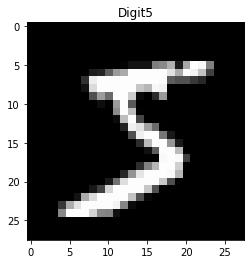

In [17]:
plt.imshow(train_digits[0],cmap='gray')
plt.title("Digit"+ str(train_labels[0]))

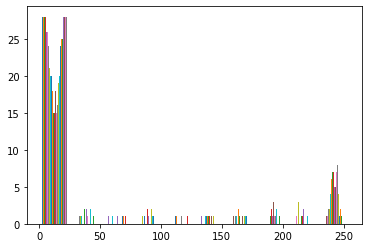

In [13]:
plt.hist(train_digits[0])
plt.show()

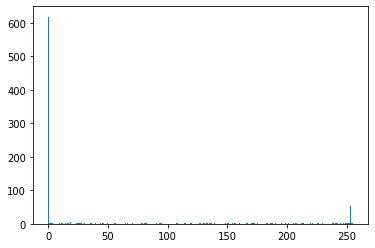

In [14]:
plt.hist(train_digits[0].flat,bins=255)
plt.show()

(array([713.,  17.,   1.,   2.,  10.,   0.,   4.,   4.,   2.,  31.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

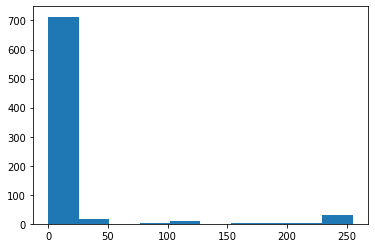

In [16]:
plt.hist(train_digits[14].flat)

Text(0.5, 1.0, 'Digit5')

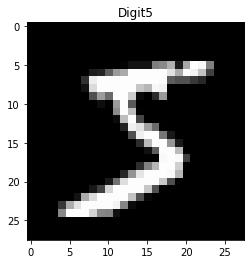

In [18]:
plt.imshow(train_digits[0],cmap='gray')
plt.title("Digit"+ str(train_labels[0]))

In [20]:
train_digits[5:10,22:25]

array([[[  0,   0,   0,   0,   0,  13,  93, 143, 121,  23,   6,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,  73, 252, 252, 253,  35,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,  31, 211, 252, 253,  35,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,  

In [21]:
train_digits[0][5:10,22:25]

array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [22]:
train_labels[10:20]

array([3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=uint8)

(array([713.,  17.,   1.,   2.,  10.,   0.,   4.,   4.,   2.,  31.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

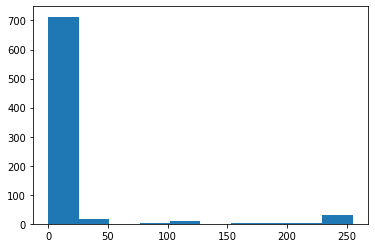

In [23]:
plt.hist(train_digits[14].flat)

In [24]:
samples = np.random.randint(train_digits.shape[0],size=16)
samples

array([30100, 33972, 33096, 32944, 53548, 44780, 43881,  1581, 48369,
       30161, 43345, 43502, 48946, 45348, 39862, 16139])

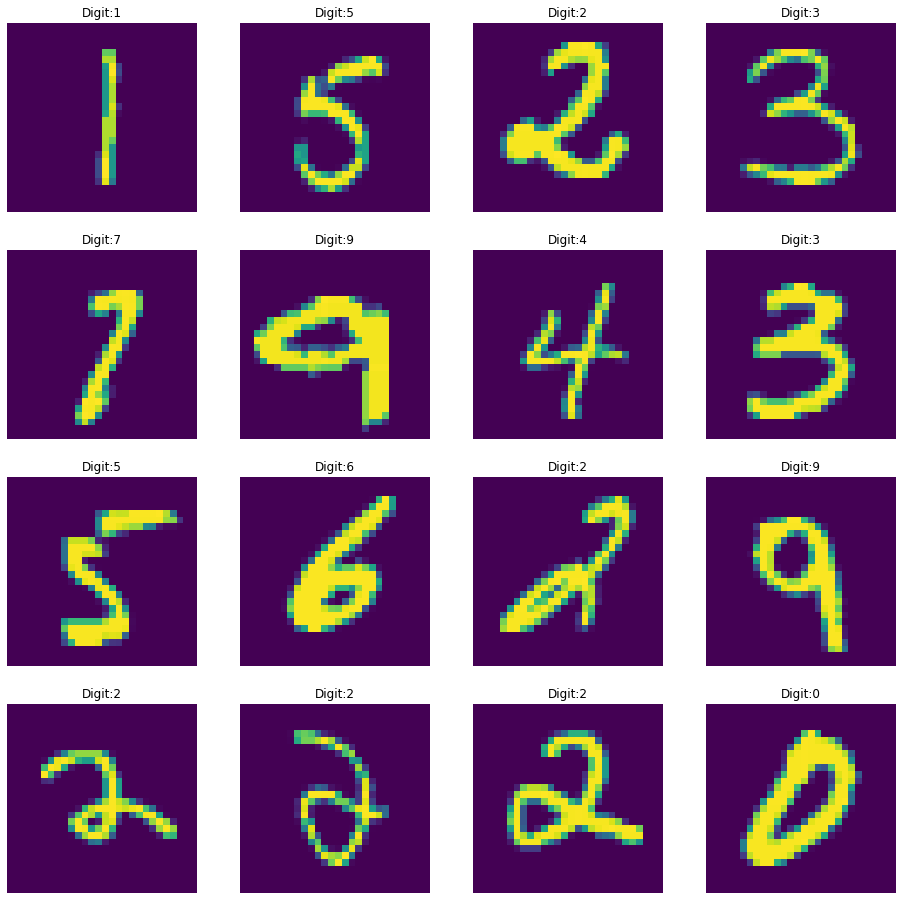

In [27]:
plt.figure(figsize = (16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:" +str(train_labels[i]))
  plt.axis('off')
  j+=1

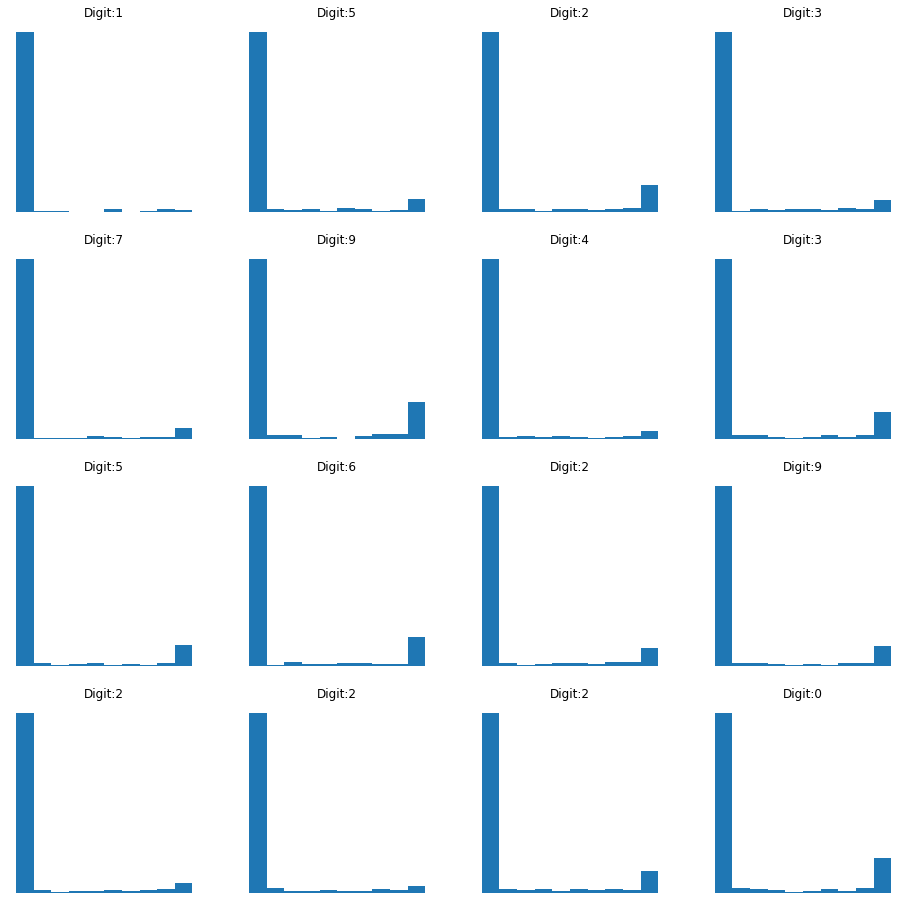

In [30]:
plt.figure(figsize = (16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.hist(train_digits[i].flat)
  plt.title("Digit:" +str(train_labels[i]))
  plt.axis('off')
  j+=1

## PreProcessing

### Scaling

In [31]:
## pixel values are from 0 to 255
train_digits_sc = train_digits/255.0
test_digits_sc  = test_digits/255.0


In [32]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [33]:
from keras.utils import to_categorical

In [36]:
train_labels_cat = to_categorical(train_labels)

In [37]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [38]:
test_labels_cat = to_categorical(test_labels)
test_labels_cat[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Split the train data and validation

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)


# Build and Train the model

# Build the model

In [43]:
## import the methods required
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [45]:
## We are creating the base model
model = Sequential()
#First layer
model.add(Flatten(input_shape = (28,28)))
## 784 pixel values as input to this Dense.128 Neurons in the layers
model.add(Dense(128,activation='relu')) #784*128 + 128
model.add(Dense(128,activation='relu')) #128*128 + 128
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
# Final layer 
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

# Compile the model
What is the loss function?<br>
What is the optimizer?<br>
What are the metrics?<br>

In [48]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])


In [49]:
history=model.fit(x=X_train,y=y_train,epochs=10,\
                  validation_data=(X_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 8s 141us/step - loss: 0.2488 - accuracy: 0.9235 - val_loss: 0.1579 - val_accuracy: 0.9553
Epoch 2/10
54000/54000 [==============================] - 7s 136us/step - loss: 0.1126 - accuracy: 0.9660 - val_loss: 0.1242 - val_accuracy: 0.9633
Epoch 3/10
54000/54000 [==============================] - 7s 135us/step - loss: 0.0828 - accuracy: 0.9744 - val_loss: 0.1028 - val_accuracy: 0.9725
Epoch 4/10
54000/54000 [==============================] - 7s 135us/step - loss: 0.0672 - accuracy: 0.9790 - val_loss: 0.1016 - val_accuracy: 0.9732
Epoch 5/10
54000/54000 [==============================] - 7s 135us/step - loss: 0.0556 - accuracy: 0.9823 - val_loss: 0.1021 - val_accuracy: 0.9715
Epoch 6/10
54000/54000 [==============================] - 7s 136us/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.1042 - val_accuracy: 0.9735
Epoch 7/10
54000/54000 [==============================] - 7s 13

In [50]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 1s 56us/step


[0.09362936761824057, 0.978600025177002]

In [51]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [52]:
test_labels[0]

7

In [53]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))


array([[2.6280955e-10, 4.1823327e-09, 6.2029507e-08, 2.7557221e-07,
        1.6394345e-09, 1.9718727e-11, 4.5215991e-14, 9.9999785e-01,
        6.5124317e-10, 1.7748329e-06]], dtype=float32)

In [54]:
model.predict(test_digits_sc[:10])

array([[2.6280955e-10, 4.1823407e-09, 6.2029621e-08, 2.7557300e-07,
        1.6394345e-09, 1.9718765e-11, 4.5216076e-14, 9.9999785e-01,
        6.5124445e-10, 1.7748346e-06],
       [2.4020771e-10, 1.3735810e-07, 9.9999988e-01, 1.0851660e-09,
        1.4637680e-11, 5.1362294e-13, 5.1946160e-12, 3.5761605e-08,
        2.3159741e-11, 4.9627409e-17],
       [2.2240978e-09, 9.9995744e-01, 3.3241452e-07, 3.3598557e-08,
        3.7482507e-06, 6.8159691e-09, 3.0420651e-08, 6.3160683e-06,
        3.2003074e-05, 1.0108769e-07],
       [9.9997091e-01, 3.7282824e-12, 2.8952076e-07, 9.9030068e-08,
        2.0804549e-09, 1.8197808e-08, 2.8150114e-05, 7.9182612e-11,
        2.7339986e-08, 4.6185315e-07],
       [6.4994914e-08, 3.5428516e-07, 2.2564494e-05, 2.5151107e-07,
        9.9955088e-01, 3.3302283e-06, 3.8075079e-06, 7.4745351e-08,
        2.5094278e-07, 4.1831535e-04],
       [4.1304633e-11, 9.9998391e-01, 6.6372561e-09, 2.1765909e-09,
        6.4948390e-06, 4.3128653e-11, 5.9483668e-11, 9.09

In [55]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))


array([7])